In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Some Numerical Information about the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

## Data Cleaning

In [3]:
# we have a space in first of coulmns and some column values, now drop that
df = df.rename(columns=lambda x : x.strip())
cols = ['education', 'self_employed', 'loan_status']
df[cols] = df[cols].applymap(lambda x : x.strip())

## Data Visualization

In [5]:
# Define list of Continuous columns Names
continuous = ['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

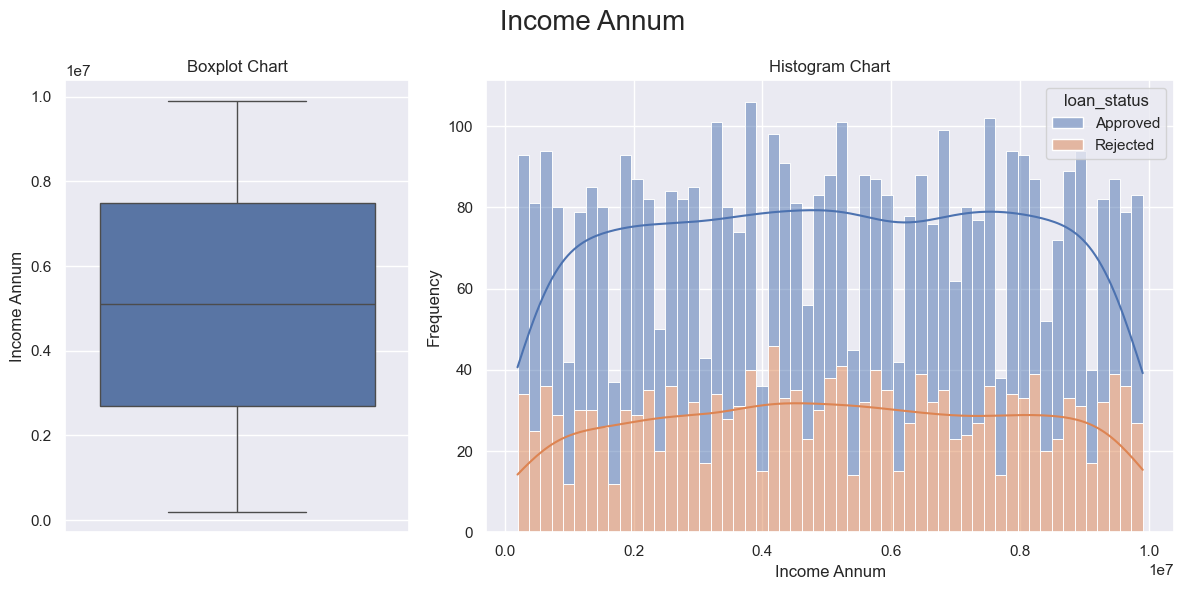

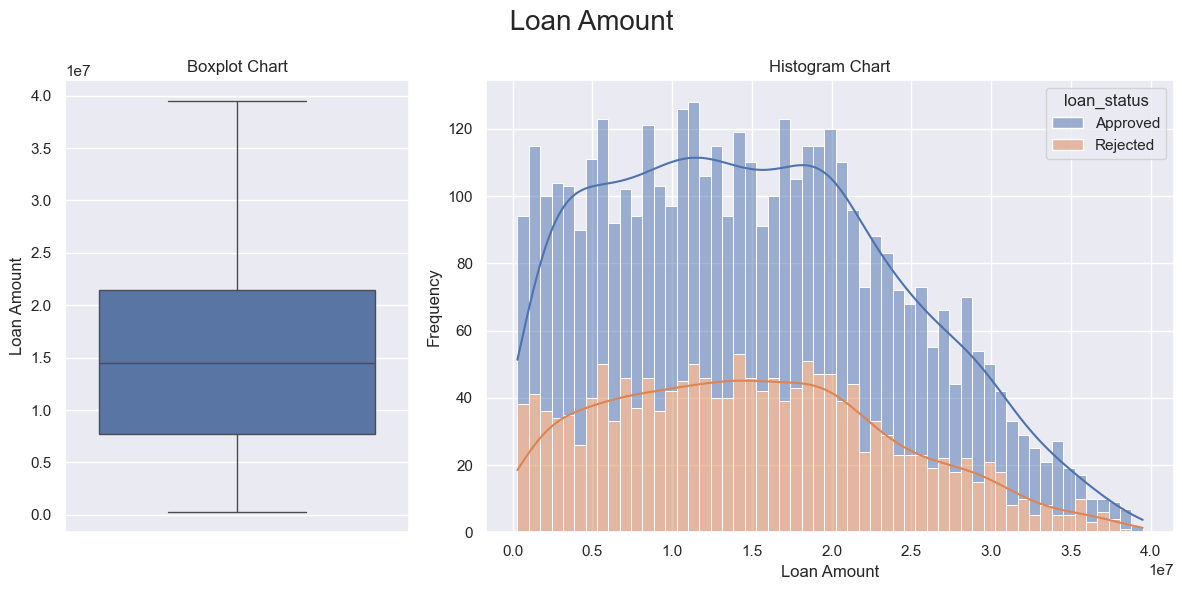

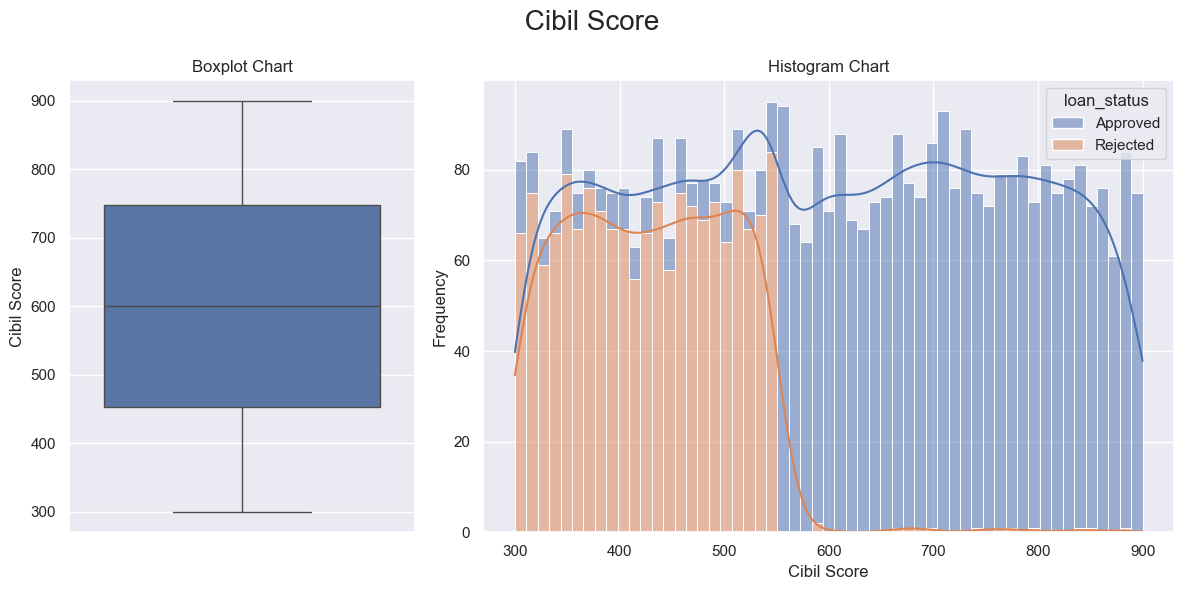

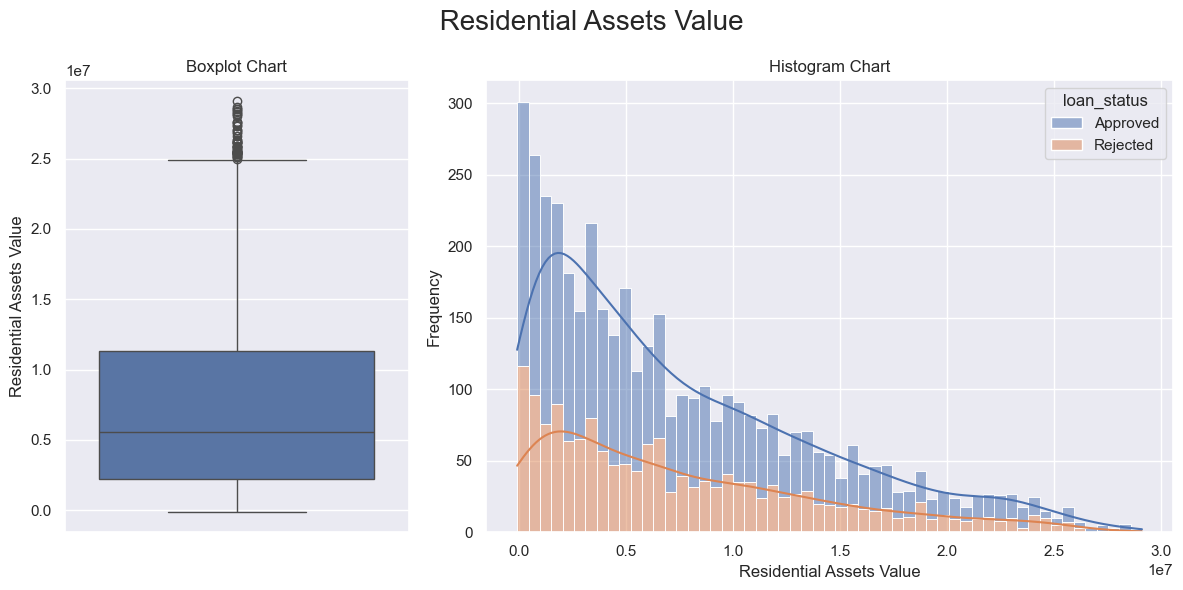

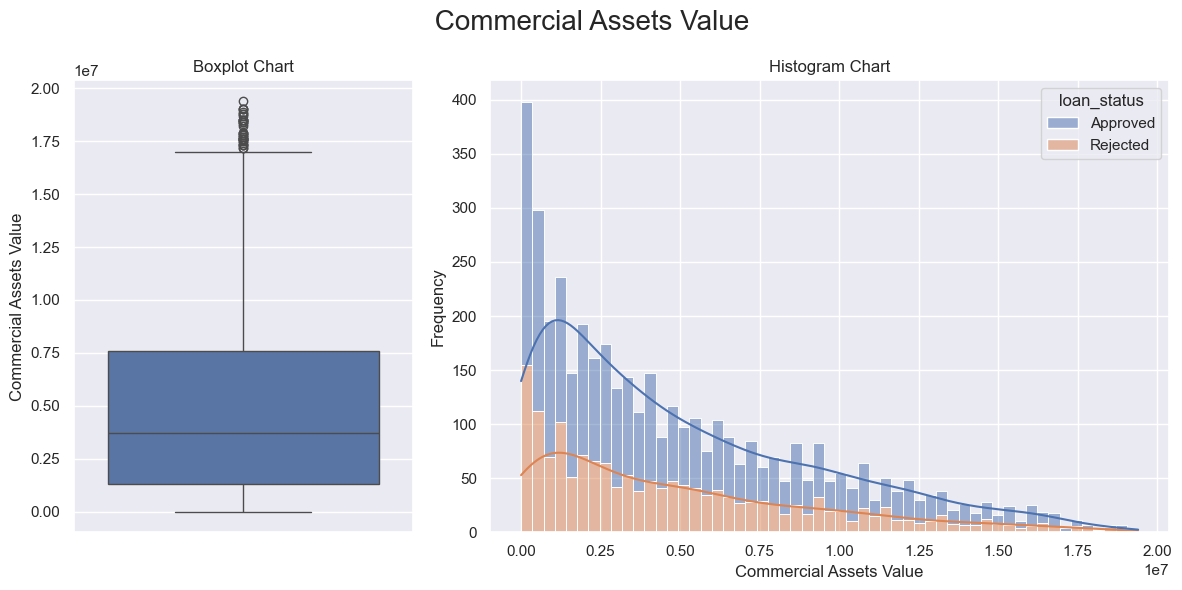

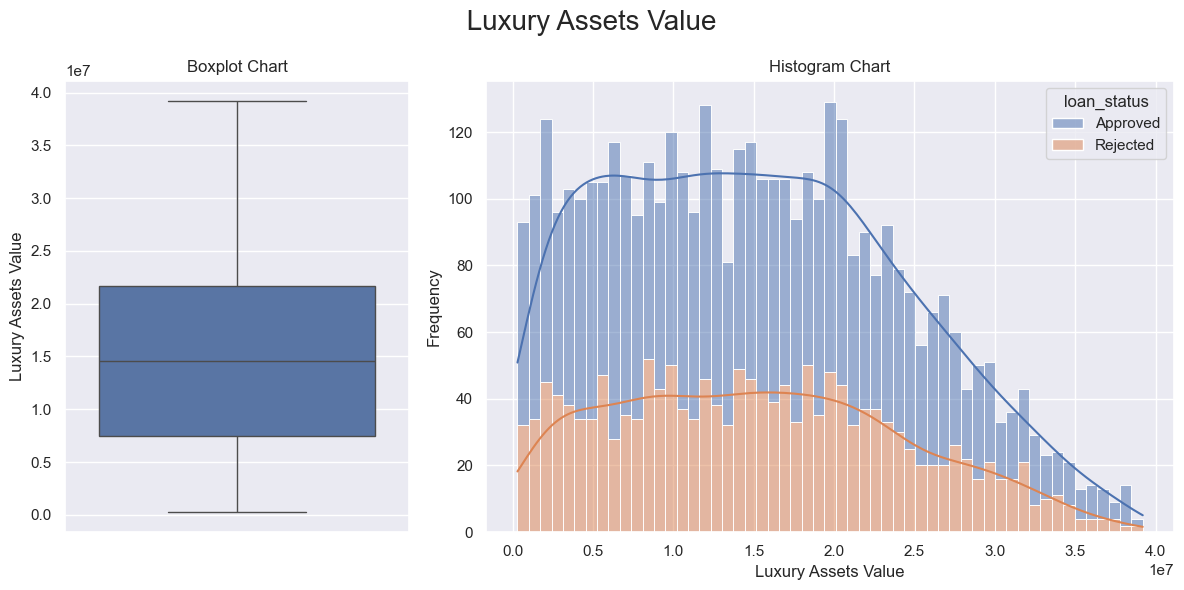

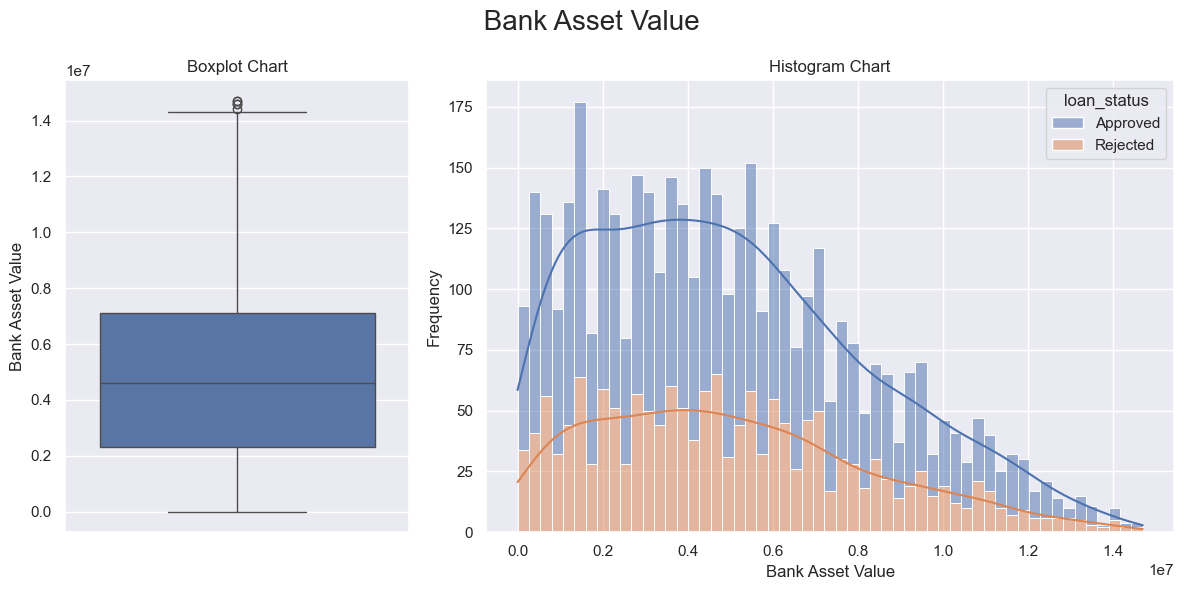

In [6]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()    
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'loan_status')    

In [7]:
# Define list of Categorical columns Names
categorical = ['self_employed', 'education']

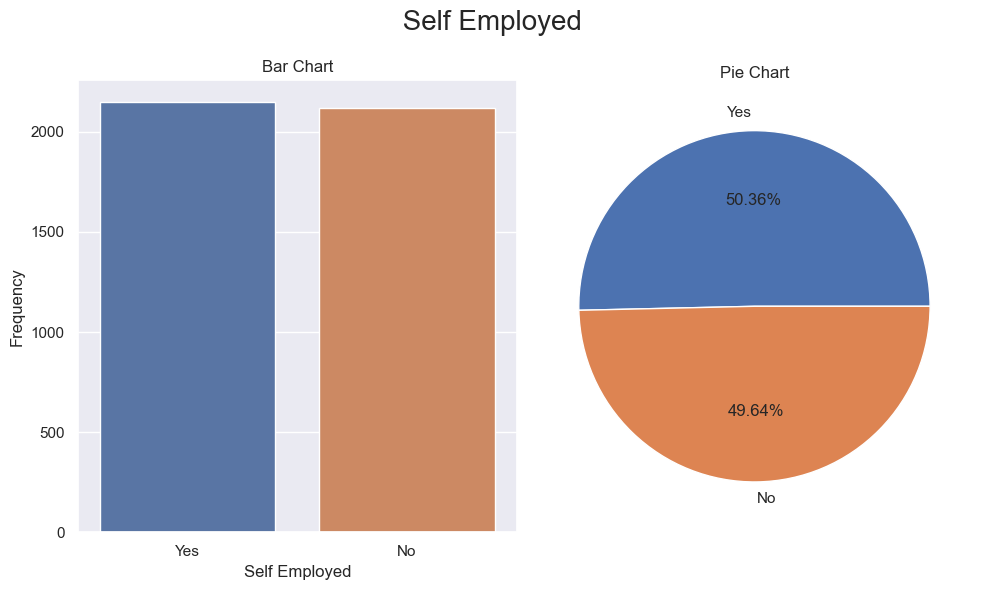

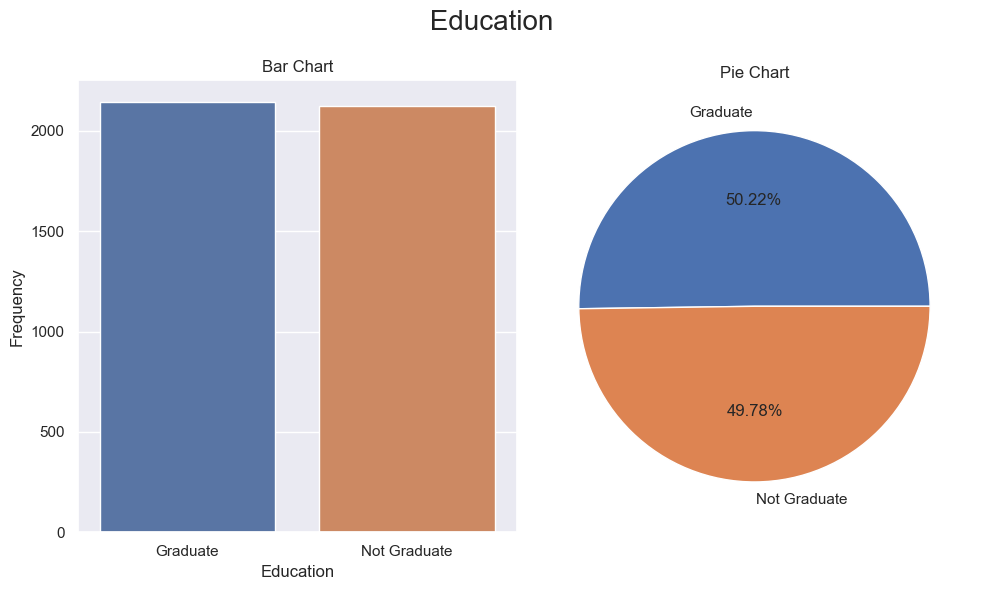

In [8]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(title(column))
    ax[0].set_ylabel('Frequency')
    
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)

    plt.tight_layout()    
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(df, cat)

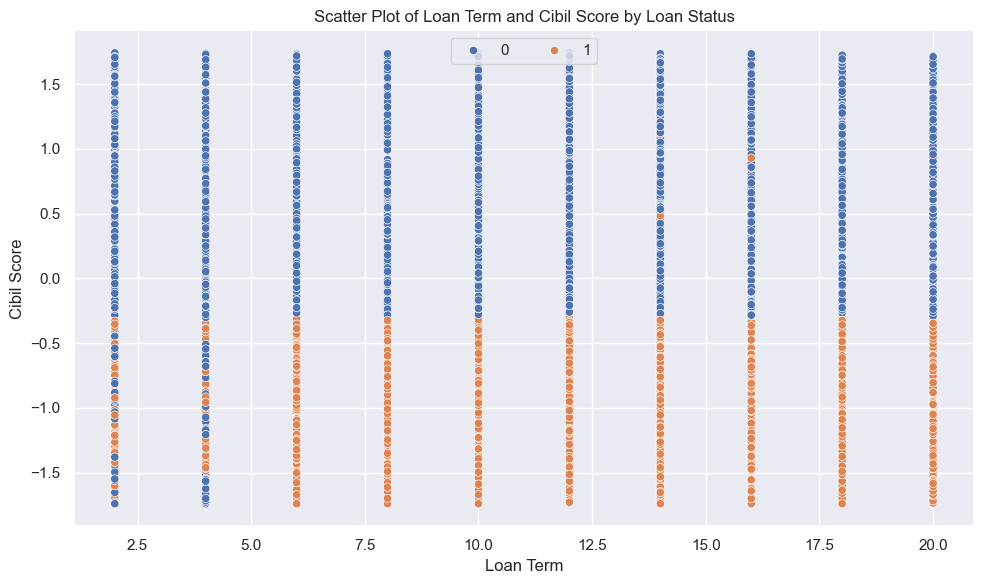

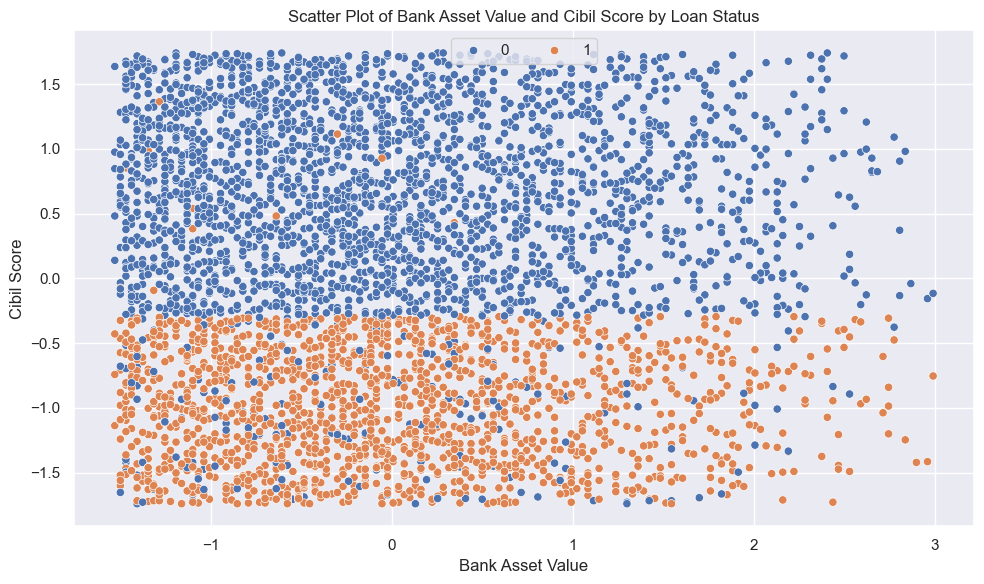

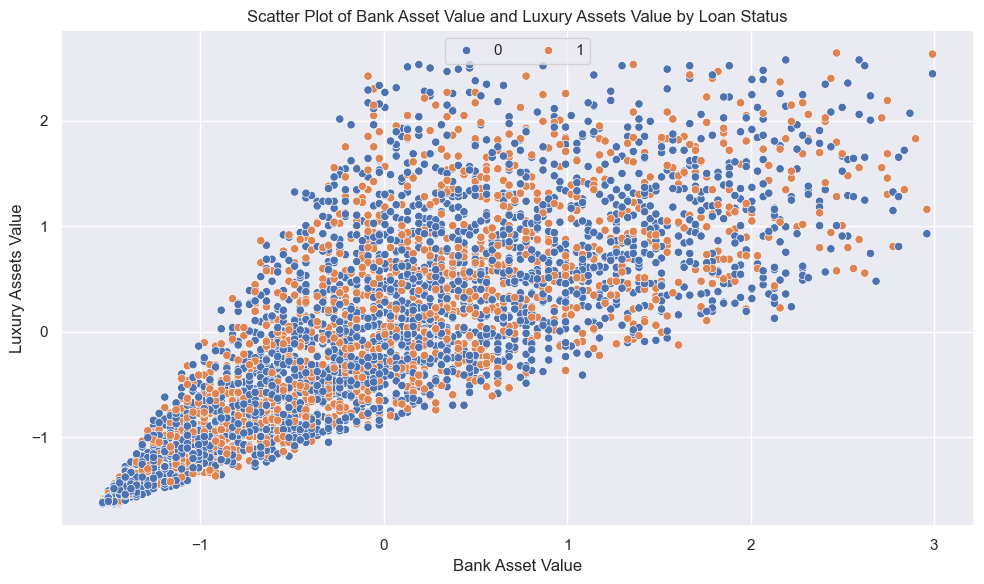

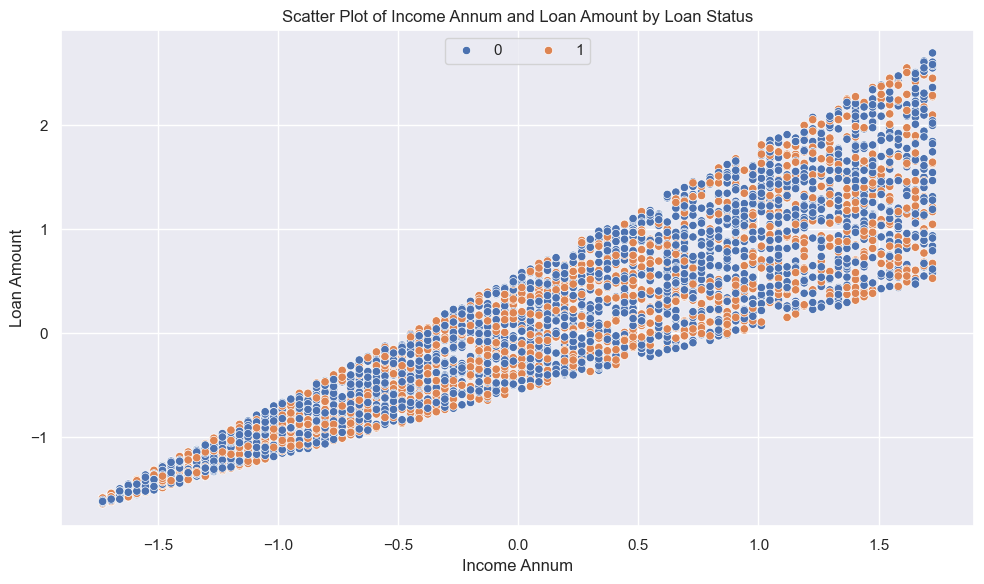

In [13]:
# Define a Function for Scatter Plot
def scatter_plot(data, x, y, hue):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Scatter Plot of {title(x)} and {title(y)} by {title(hue)}')
    plt.legend(title=None, ncol=2, loc='upper center')
    plt.xlabel(title(x))
    plt.ylabel(title(y))

    plt.tight_layout()
    plt.show()

scatter_plot(data=df, x="loan_term", y="cibil_score", hue="loan_status")
scatter_plot(data=df, x="bank_asset_value", y="cibil_score", hue="loan_status")
scatter_plot(data=df, x="bank_asset_value", y="luxury_assets_value", hue="loan_status")
scatter_plot(data=df, x="income_annum", y="loan_amount", hue="loan_status")

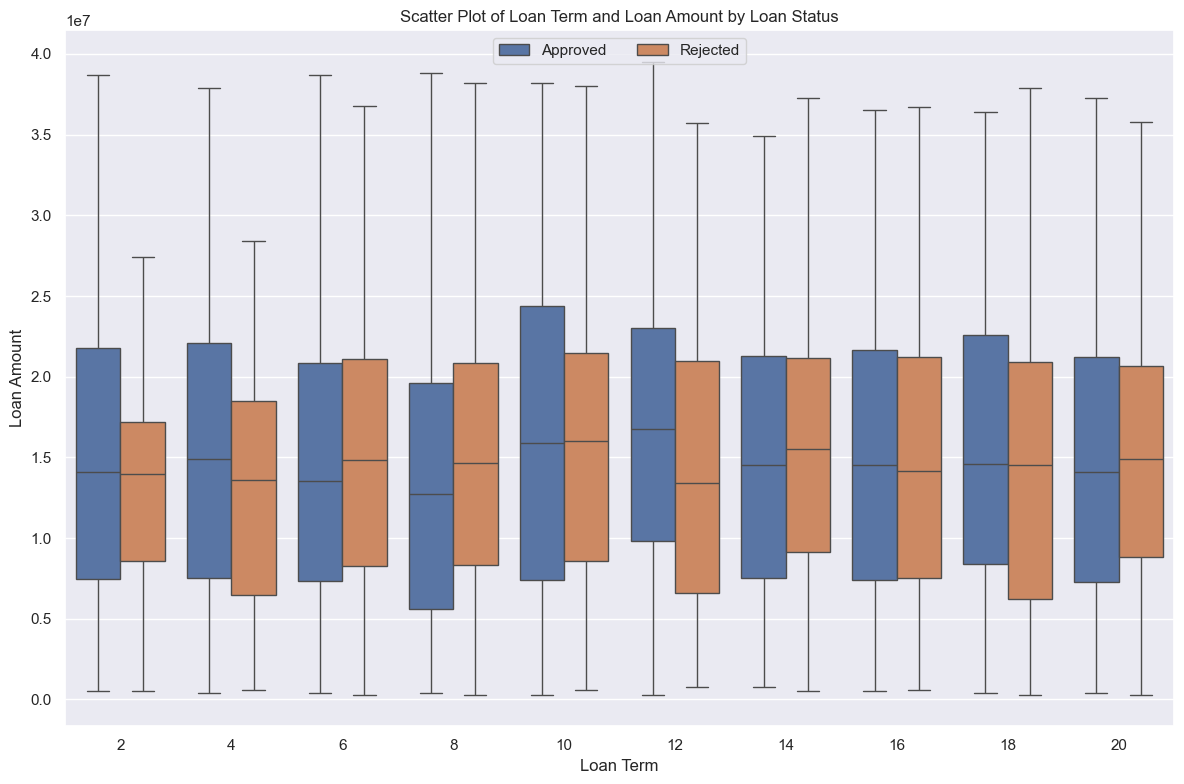

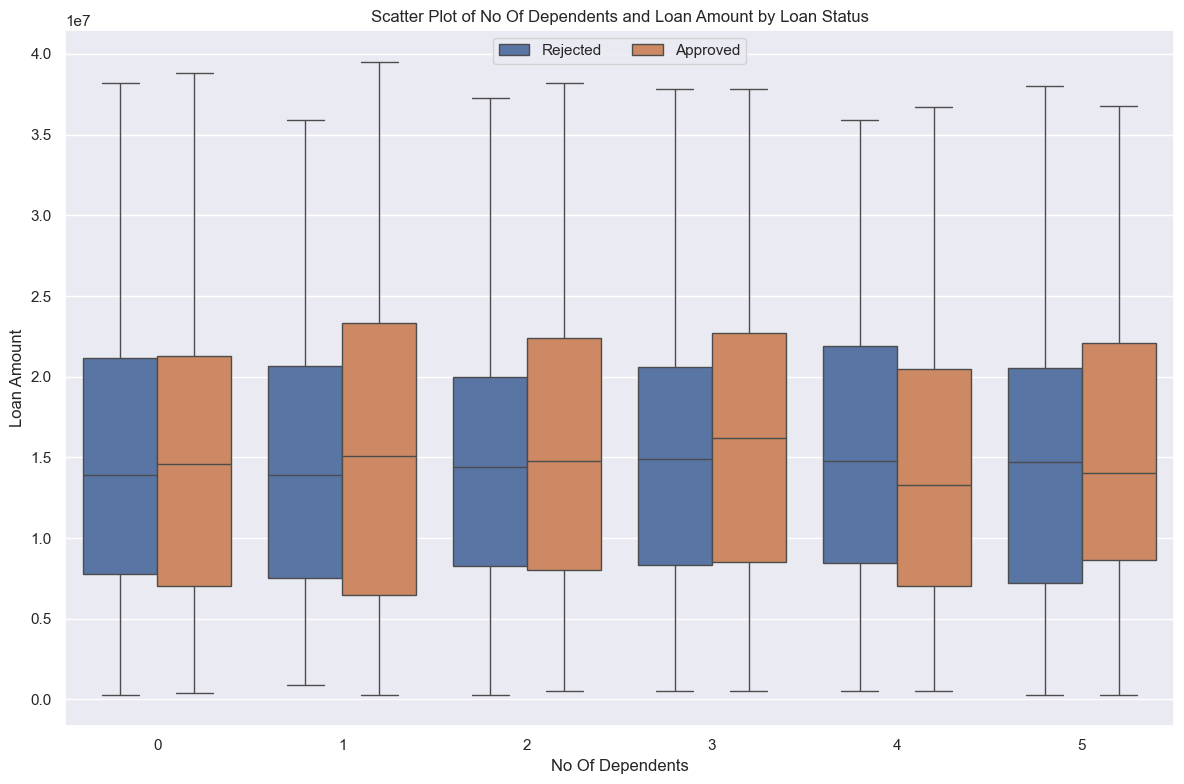

In [10]:
# Define a Function for Scatter Plot
def box_plot(data, x, y, hue):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Scatter Plot of {title(x)} and {title(y)} by {title(hue)}')
    plt.legend(title=None, ncol=2, loc='upper center')
    plt.xlabel(title(x))
    plt.ylabel(title(y))

    plt.tight_layout()
    plt.show()

box_plot(data=df, x="loan_term", y="loan_amount", hue="loan_status")
box_plot(data=df, x="no_of_dependents", y="loan_amount", hue="loan_status")

## Data Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['bank_asset_value', 'luxury_assets_value', 'commercial_assets_value', 'residential_assets_value', 'cibil_score','loan_amount','income_annum']
le_cols = ['loan_status', 'education', 'self_employed']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply Label Encoder to the selected column
for col in le_cols :
    df[col] = le.fit_transform(df[col])

## Training and Evaluating Different Models

In [12]:
from sklearn.model_selection import train_test_split 

x = df.drop(['loan_status', 'loan_id'], axis=1)
y = df['loan_status']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [21]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()


Training accuracy: Gradient Boosting 0.99502196193265
Test accuracy: Gradient Boosting 0.977751756440281

Training accuracy: K-Nearest Neighbors 0.9376281112737921
Test accuracy: K-Nearest Neighbors 0.8981264637002342

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.9754098360655737

Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.9765807962529274

Training accuracy: XGB Classifier 1.0
Test accuracy: XGB Classifier 0.9824355971896955



In [22]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

accuracy = accuracy_score(y_test, xgb_pred)
print(f'R-squared (XGB Classifier): {round(accuracy, 3)}')

R-squared (XGB Classifier): 0.982


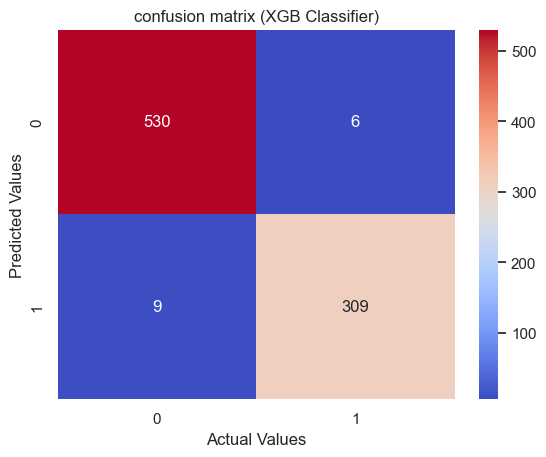

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,xgb_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix (XGB Classifier)')
plt.show()

In [26]:
# Visualize Classification report for XGB Classifier
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



### Summary and Conclusion

In this project, I focused on predicting loan approval using various data preprocessing techniques and a machine learning model. The steps and methodologies employed are as follows:

1. Data Cleaning:
   - Column and Value Cleanup: Removed spaces from column names and values to ensure consistency and avoid errors during data processing.

2. Data Visualization:
   - Created appropriate visualizations to explore and understand the data patterns and relationships, providing valuable insights into the dataset.

3. Data Standardization and Label Encoding:
   - Performed data standardization to normalize the features.
   - Applied label encoding to convert categorical variables into numerical format.

4. Model Training and Evaluation:
   - Trained an XGBoost (XGB) model on the processed dataset.
   - The model achieved a high accuracy of 98.2%.

These steps ensured a comprehensive analysis and model training process, leading to a highly accurate prediction model for loan approval.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com
